In [60]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from prophet import Prophet

In [61]:
df = yf.download("AAPL", start="2018-01-01", end="2023-12-31", progress=False)
df = df.reset_index()

In [62]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,42.540001,43.075001,42.314999,43.064999,40.670975,102223600
1,2018-01-03,43.132500,43.637501,42.990002,43.057499,40.663887,118071600
2,2018-01-04,43.134998,43.367500,43.020000,43.257500,40.852779,89738400
3,2018-01-05,43.360001,43.842499,43.262501,43.750000,41.317898,94640000
4,2018-01-08,43.587502,43.902500,43.482498,43.587502,41.164436,82271200


In [63]:
date_split = '2023-08-01'
x_train = df[df['Date'] < date_split]
x_test = df[df['Date'] >= date_split]

In [64]:
display(x_train.shape)
display(x_test.shape)

(1403, 7)

(106, 7)

In [65]:
df_prophet_train = x_train[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})

In [66]:
model = Prophet(
    weekly_seasonality=True,
    yearly_seasonality=True,
    daily_seasonality=False,
)
model.add_country_holidays(country_name='US')

In [67]:
model.fit(df_prophet_train)

00:05:19 - cmdstanpy - INFO - Chain [1] start processing
00:05:19 - cmdstanpy - INFO - Chain [1] done processing


In [68]:
future = model.make_future_dataframe(periods=150)
prediction = model.predict(future)

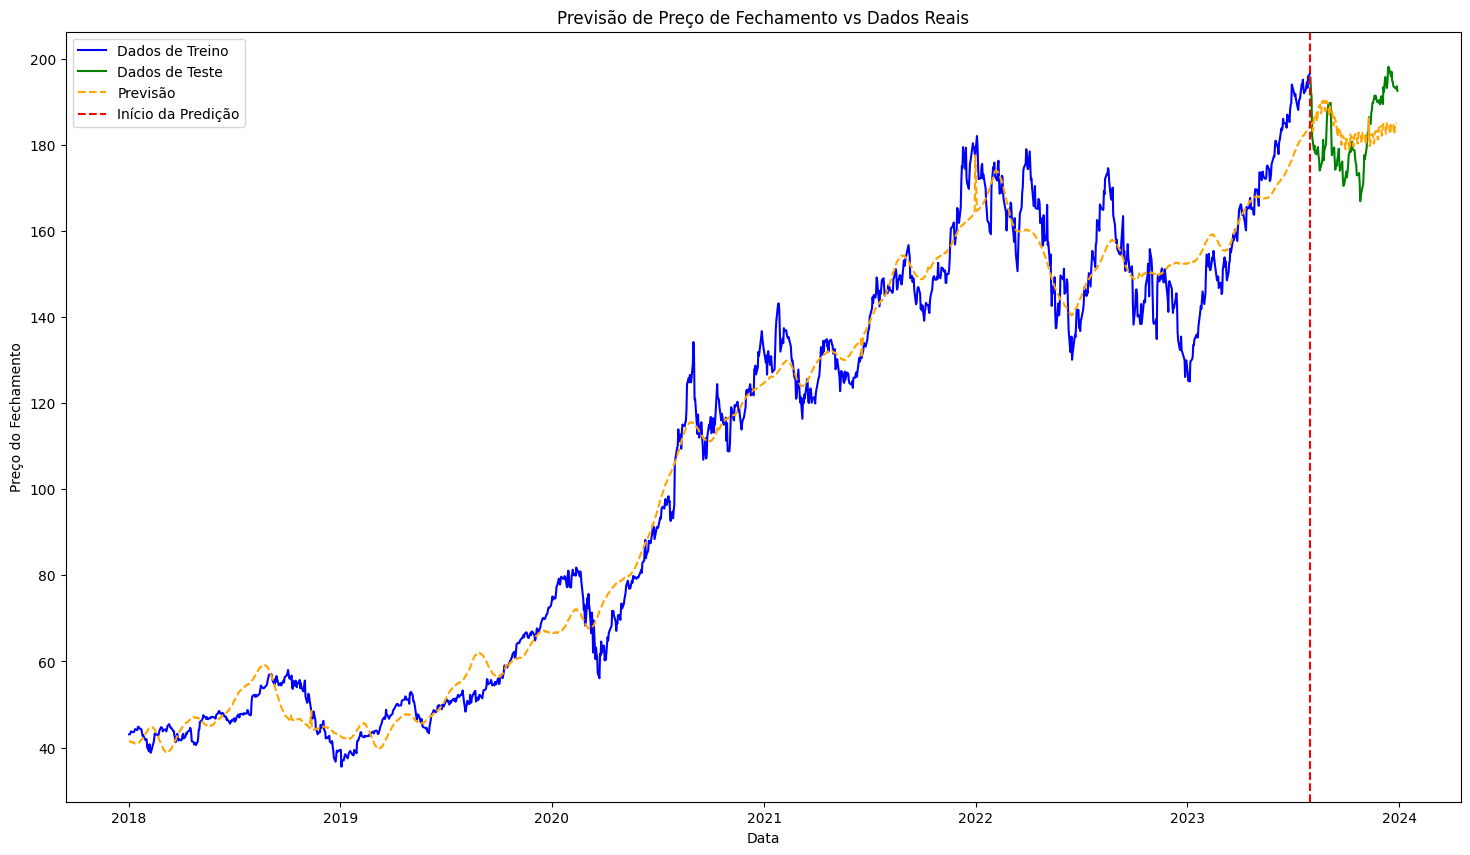

In [69]:
plt.figure(figsize=(18, 10))
plt.plot(x_train['Date'], x_train['Close'], label='Dados de Treino', color='blue')
plt.plot(x_test['Date'], x_test['Close'], label='Dados de Teste', color='green')
plt.plot(prediction['ds'], prediction['yhat'], label='Previsão', color='orange', linestyle='--')

plt.axvline(x_train['Date'].max(), color='red', linestyle='--', label='Início da Predição')
plt.xlabel('Data')
plt.ylabel('Preço do Fechamento')
plt.title('Previsão de Preço de Fechamento vs Dados Reais')
plt.legend()
plt.show()